<a href="https://colab.research.google.com/github/springboardmentor441/-IPL_infographics_Infosys_Internship_Oct2024/blob/Sivani/IPL_Deliverables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
matches=pd.read_csv('matches.csv')

In [ ]:
deliveries=pd.read_csv('deliveries.csv')

In [ ]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
matches['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

TOP 10 BATSMEN

In [ ]:
batsman=deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
sorted_batsman=batsman.sort_values(by='batsman_runs',ascending=False)
top_10_batsman=sorted_batsman.head(10)

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


Text(0, 0.5, 'scores')

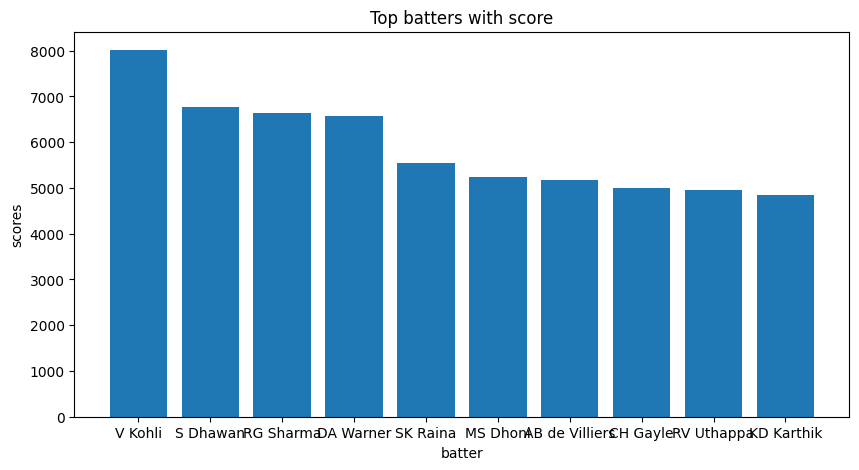

In [ ]:
player=top_10_batsman['batter']
scores=top_10_batsman['batsman_runs']
fig = plt.figure(figsize = (10,5))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

TOP 10 BOWLERS

In [ ]:
bowler_data = deliveries[['match_id', 'bowler', 'is_wicket', 'total_runs']]
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

In [ ]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,205
348,PP Chawla,192
119,DJ Bravo,183
71,B Kumar,181
355,R Ashwin,180
446,SP Narine,180
8,A Mishra,174
438,SL Malinga,170
193,JJ Bumrah,168
373,RA Jadeja,160


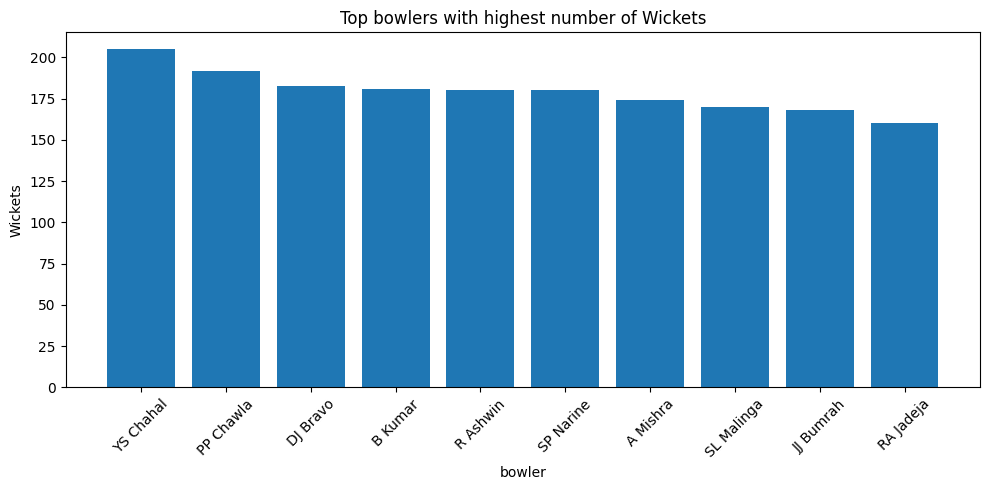

In [ ]:
top_10_bowlers=top_bowlers['bowler']
wickets_scored=top_bowlers['wickets']
fig = plt.figure(figsize = (10,5))
plt.bar(top_10_bowlers,wickets_scored)
plt.title('Top bowlers with highest number of Wickets')
plt.xlabel('bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.tight_layout()

**PLAYER LEVEL ANALYSIS**


Strike Rate calculation for batsmen with a minimum target run threshold

In [ ]:
batsman_data = deliveries[['batter', 'batsman_runs']]
runs = batsman_data.groupby('batter')['batsman_runs'].sum().reset_index()
runs.rename(columns={'batsman_runs': 'total_runs'}, inplace=True)
balls_faced = deliveries[deliveries['extras_type'] != 'wides'].groupby('batter').size().reset_index(name='balls_faced')
batsman_stats = pd.merge(runs, balls_faced, on='batter')
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100
top_10_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)
top_10_batsmen

              batter  total_runs  balls_faced  strike_rate
312           L Wood           9            3   300.000000
97        B Stanlake           5            2   250.000000
234  J Fraser-McGurk         330          141   234.042553
461    R Sai Kishore          13            6   216.666667
629         Umar Gul          39           19   205.263158
497         RS Sodhi           4            2   200.000000
465       R Shepherd         115           63   182.539683
410       Naman Dhir         140           79   177.215190
318        LJ Wright         106           60   176.666667
583    Shahid Afridi          81           46   176.086957


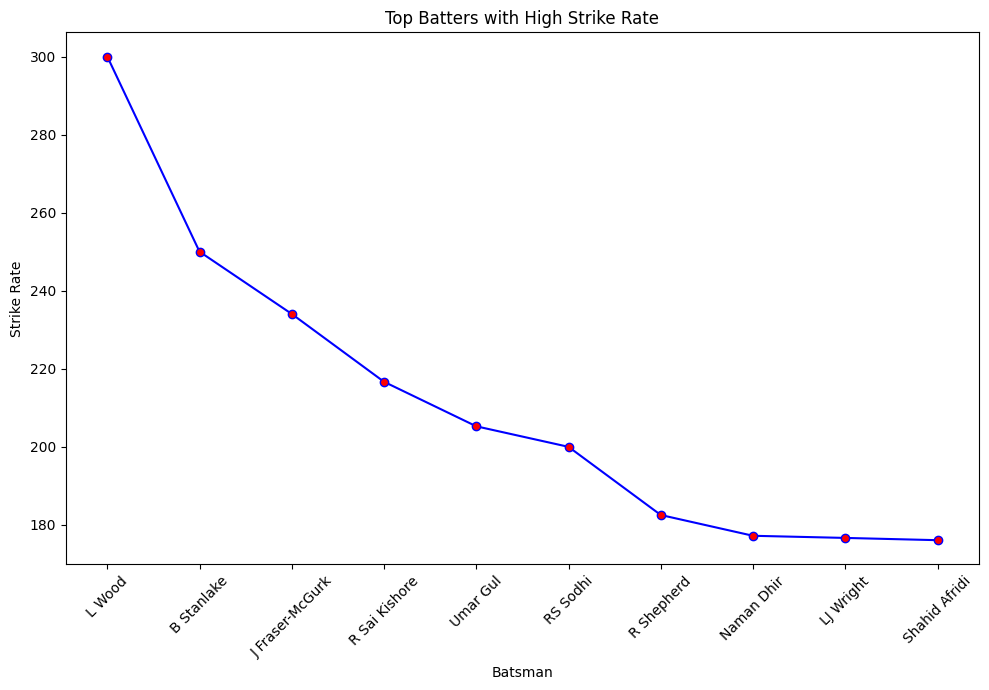

In [ ]:
top_batter_strike=top_10_batsmen['batter']
strike_rate=top_10_batsmen['strike_rate']
fig=plt.figure(figsize=(10,7))
plt.plot(top_batter_strike, strike_rate,marker='o',mfc = 'r', color='blue', linestyle='-')
plt.title("Top Batters with High Strike Rate")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.tight_layout()

List of players with the highest number of 'Man of the Match' awards

In [ ]:
man_of_match=matches.player_of_match.value_counts().reset_index()
top_15=man_of_match.head(15)
top_15

,player_of_match,count
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,SR Watson,16
7,YK Pathan,16
8,RA Jadeja,16
9,AD Russell,15


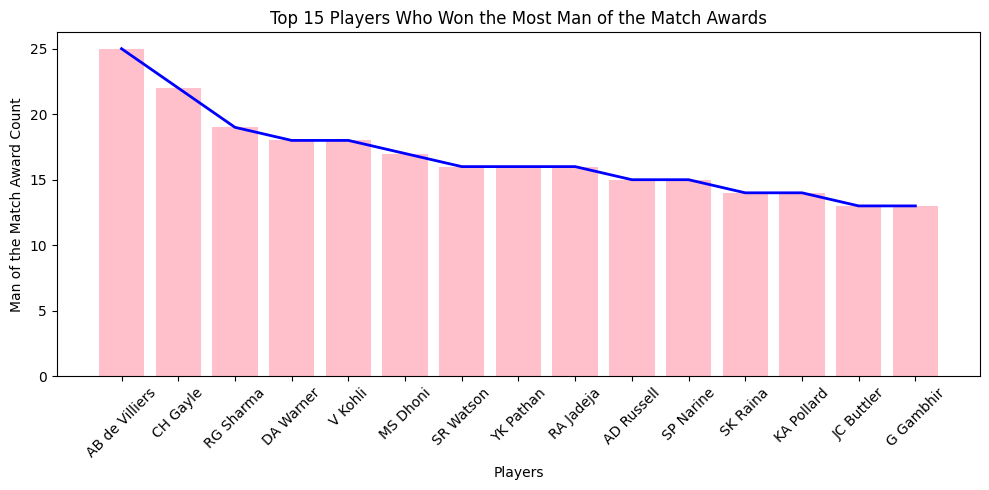

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(top_15["player_of_match"], top_15["count"], color='pink', label='Man of the Match Count')
plt.plot(top_15["player_of_match"], top_15["count"], color='blue', linestyle='-', linewidth=2, label='Trend Line')
plt.title("Top 15 Players Who Won the Most Man of the Match Awards")
plt.xlabel("Players")
plt.ylabel("Man of the Match Award Count")
plt.xticks(rotation=45)
plt.tight_layout()

Economy rate calculation for bowlers exceeding a specific ball limit

In [ ]:
# Step 1: Calculate Total Runs Conceded and Balls Bowled for Each Bowler
bowler_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

In [ ]:
# Step 2: Calculate Overs Bowled
bowler_stats['overs'] = bowler_stats['total_balls']//6

In [ ]:
# Step 3: Filter out bowlers with zero overs to avoid division errors
bowler_stats = bowler_stats[bowler_stats['overs'] > 0]

In [ ]:
# Step 4: Calculate Economy Rate
bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs']

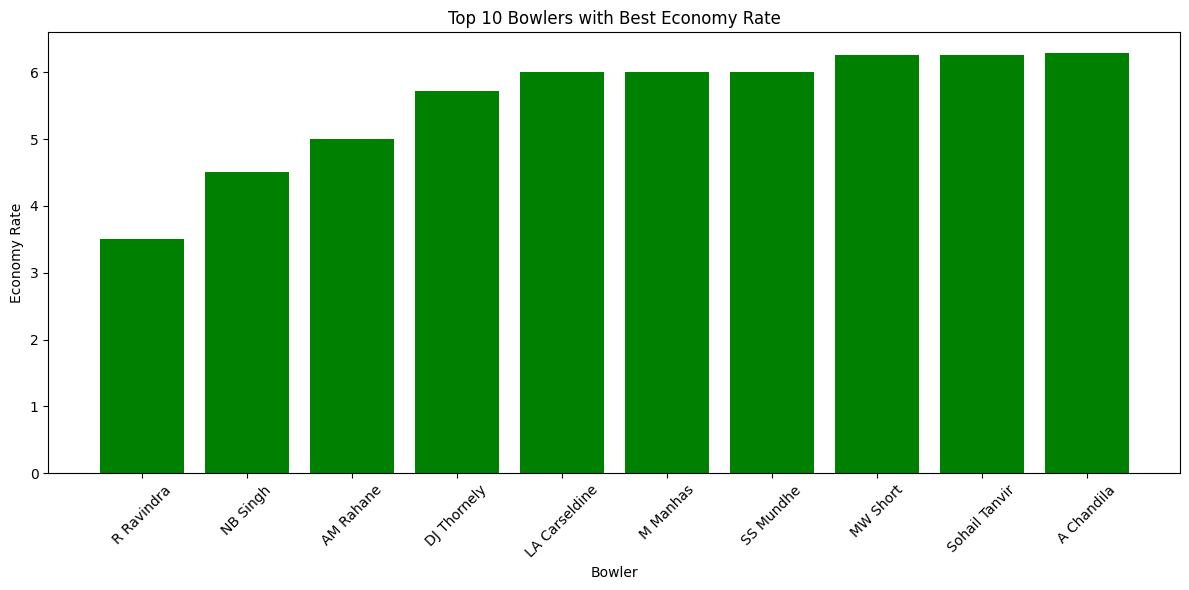

In [ ]:
# Step 5: Sort and Get Top 10 Bowlers with Lowest Economy Rate
top_10_economy_bowlers = bowler_stats.sort_values(by='economy_rate').head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_economy_bowlers['bowler'], top_10_economy_bowlers['economy_rate'], color='green')
plt.title('Top 10 Bowlers with Best Economy Rate')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()


Best all-rounder performance considering batting, bowling, and fielding factors.

In [ ]:
# Batting Performance
batting = deliveries.groupby('batter').agg(
    Total_Runs=('batsman_runs', 'sum'),
    Balls_Faced=('ball', 'count'),
    Dismissals=('is_wicket', 'sum')
).reset_index()
batting['Strike_Rate'] = (batting['Total_Runs'] / batting['Balls_Faced']) * 100
batting['Batting_Average'] = batting.apply(
    lambda x: x['Total_Runs'] if x['Dismissals'] == 0 else x['Total_Runs'] / x['Dismissals'], axis=1
)

In [ ]:
# Bowling Performance
bowling = deliveries.groupby('bowler').agg(
    Total_Wickets=('is_wicket', 'sum'),
    Total_Runs_Conceded=('batsman_runs', 'sum'),
    Total_Balls=('ball', 'count')
).reset_index()
bowling['Overs'] = bowling['Total_Balls'] // 6
bowling['Economy_Rate'] = bowling['Total_Runs_Conceded'] / bowling['Overs']
bowling['Bowling_Average'] = bowling['Total_Runs_Conceded'] / bowling['Total_Wickets']

In [ ]:
# Fielding Performance
fielding = deliveries.groupby('fielder').agg(
    Total_Catches=('is_wicket', 'sum')
).reset_index()

all_rounders = pd.merge(batting, bowling, left_on='batter', right_on='bowler', how='inner')
all_rounders = pd.merge(all_rounders, fielding, left_on='batter', right_on='fielder', how='left')

In [ ]:
# Fill missing fielding stats with 0
all_rounders['Total_Catches'] = all_rounders['Total_Catches'].fillna(0)

In [ ]:
# Normalize Batting Scores
max_batting_average = all_rounders['Batting_Average'].max()

if max_batting_average > 0:
    all_rounders['Batting_Score'] = all_rounders['Batting_Average'] / max_batting_average
else:
    all_rounders['Batting_Score'] = 0  # If no player has a valid batting average
all_rounders['Bowling_Score'] = all_rounders['Total_Wickets'] / all_rounders['Total_Wickets'].max()
all_rounders['Fielding_Score'] = all_rounders['Total_Catches'] / all_rounders['Total_Catches'].max()

In [ ]:
# Weighted All-Rounder Score
all_rounders['All_Rounder_Score'] = (
    0.4 * all_rounders['Batting_Score'] +
    0.4 * all_rounders['Bowling_Score'] +
    0.2 * all_rounders['Fielding_Score']
)
top_all_rounders = all_rounders.sort_values('All_Rounder_Score', ascending=False).head(10)
print(top_all_rounders[['batter', 'All_Rounder_Score']])

            batter  All_Rounder_Score
332      RA Jadeja           0.615539
108       DJ Bravo           0.583960
159  Iqbal Abdulla           0.499101
308      PP Chawla           0.498637
315       R Ashwin           0.494451
466      YS Chahal           0.479250
396      SP Narine           0.478358
39        AR Patel           0.471547
8         A Mishra           0.455313
65         B Kumar           0.446903


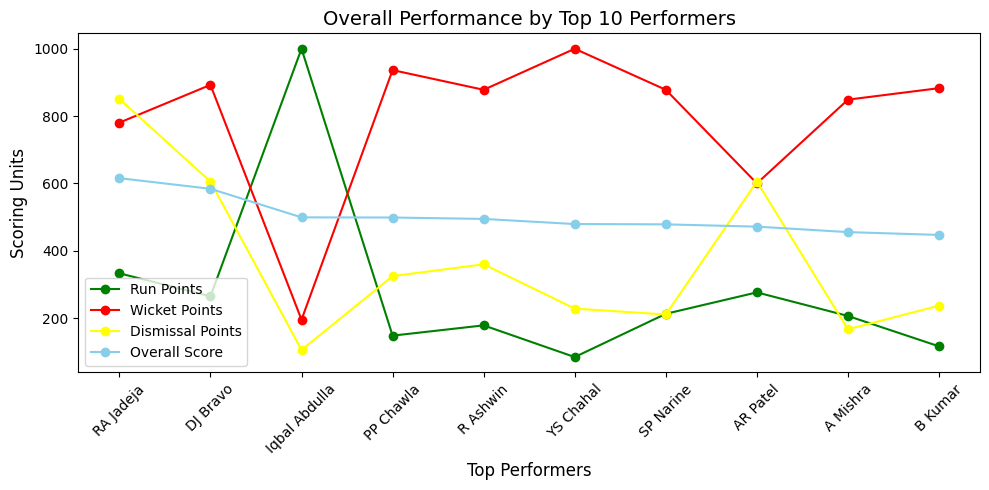

In [ ]:
players = top_all_rounders['batter']
run_points = top_all_rounders['Batting_Score'] * 1000  # Scaled for visualization
wicket_points = top_all_rounders['Bowling_Score'] * 1000
dismissal_points = top_all_rounders['Fielding_Score'] * 1000
overall_score = top_all_rounders['All_Rounder_Score'] * 1000
plt.figure(figsize=(10, 5))
plt.plot(players, run_points, label="Run Points", color='green', marker='o')
plt.plot(players, wicket_points, label="Wicket Points", color='red', marker='o')
plt.plot(players, dismissal_points, label="Dismissal Points", color='yellow', marker='o')
plt.plot(players, overall_score, label="Overall Score", color='skyblue', marker='o')
plt.title("Overall Performance by Top 10 Performers", fontsize=14)
plt.xlabel("Top Performers", fontsize=12)
plt.ylabel("Scoring Units", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

**Team-wise Analysis reports**


Innings-wise batting and bowling averages for each team

In [ ]:
merged_data = deliveries.merge(matches, left_on='match_id', right_on='id')

In [ ]:
# Step 1: Calculate Batting Average
batting_data = merged_data[['inning', 'batting_team', 'batsman_runs', 'is_wicket']]
batting_summary = batting_data.groupby(['inning', 'batting_team']).agg(
    Total_Runs=('batsman_runs', 'sum'),
    Total_Outs=('is_wicket', 'sum')
).reset_index()
batting_summary['Batting_Average'] = batting_summary['Total_Runs'] / batting_summary['Total_Outs']

In [ ]:
# Step 2: Calculate Bowling Average
bowling_data = merged_data[['inning', 'bowling_team', 'batsman_runs', 'is_wicket']]
bowling_summary = bowling_data.groupby(['inning', 'bowling_team']).agg(
    Total_Runs_Conceded=('batsman_runs', 'sum'),
    Total_Wickets=('is_wicket', 'sum')
).reset_index()
bowling_summary['Bowling_Average'] = bowling_summary['Total_Runs_Conceded'] / bowling_summary['Total_Wickets']

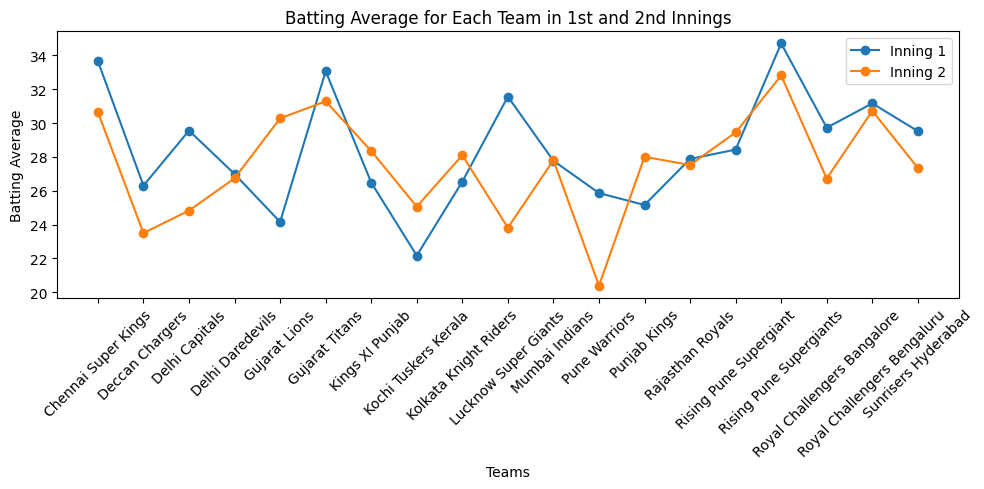

In [ ]:
# Step 3: Plot Batting Average
plt.figure(figsize=(10,5))
for inning in [1, 2]:
    data = batting_summary[batting_summary['inning'] == inning]
    plt.plot(data['batting_team'], data['Batting_Average'], marker='o', linestyle='-', label=f"Inning {inning}")
plt.title("Batting Average for Each Team in 1st and 2nd Innings")
plt.xlabel("Teams")
plt.ylabel("Batting Average")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

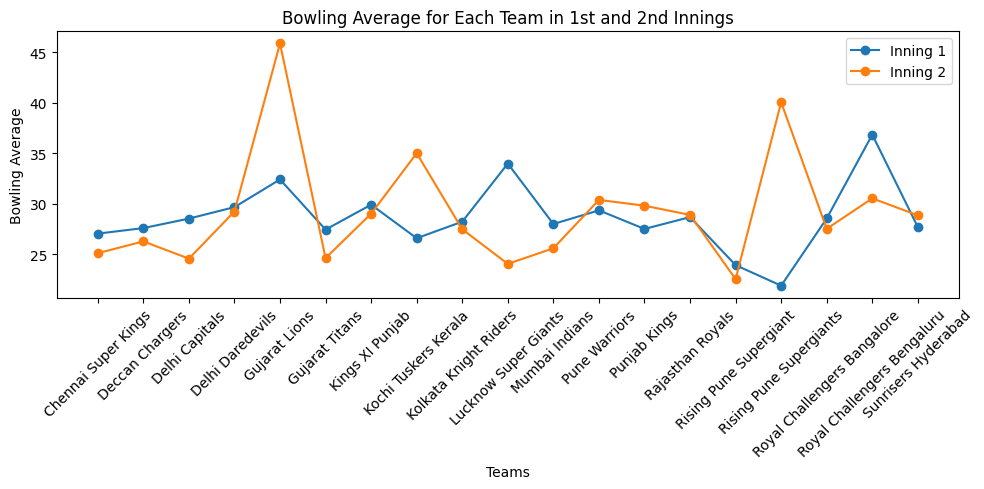

In [ ]:
# Step 4: Plot Bowling Average
plt.figure(figsize=(10,5))
for inning in [1, 2]:
    data = bowling_summary[bowling_summary['inning'] == inning]
    plt.plot(data['bowling_team'], data['Bowling_Average'], marker='o', linestyle='-', label=f"Inning {inning}")

plt.title("Bowling Average for Each Team in 1st and 2nd Innings")
plt.xlabel("Teams")
plt.ylabel("Bowling Average")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Win/loss analysis by runs or wickets for each team.

 Head-to-head match analysis between IPL teams.

In [ ]:
#Create unique list of teams
teams=pd.concat([matches['team1'],matches['team2']]).unique()

In [ ]:
#Initialize matrix with all 0's
head_to_head_matrix=pd.DataFrame(0,index=teams,columns=teams)

In [ ]:
for _,r in matches.iterrows():
  winner=r['winner']
  if(winner==r['team1']):
    head_to_head_matrix.at[r['team1'],r['team2']]+=1
  else:
    head_to_head_matrix.at[r['team2'],r['team1']]+=1

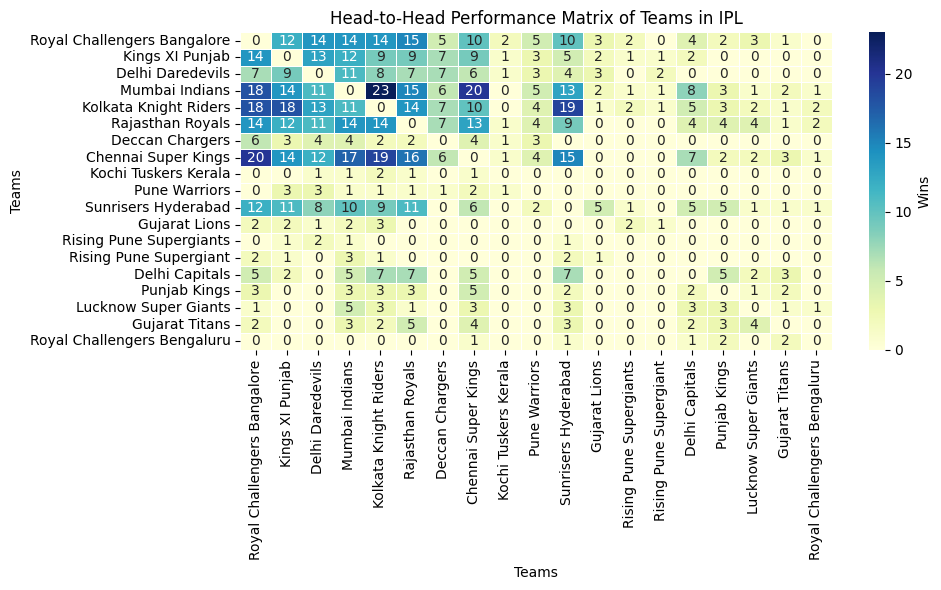

In [ ]:
#Create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(head_to_head_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar_kws={'label':'Wins'},linewidths=0.5)

#Customize the plot
plt.title('Head-to-Head Performance Matrix of Teams in IPL')
plt.xlabel('Teams',fontsize=10)
plt.ylabel('Teams',fontsize=10)

#Show the plot
plt.tight_layout()
plt.show()